In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

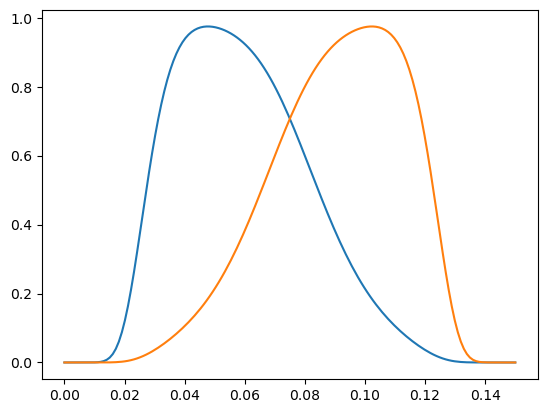

In [2]:
lengthRepump=0.15
tRepump,tRepumpStep = np.linspace(0, lengthRepump, 150, retstep=True)

a=11
n=4
c=0.05
def stokes_shape_plot(t,T):
    return (np.exp(-((t - (T/2))/c)**(2*n))*np.cos(np.pi/2*(1/(1 + np.exp((-a*(t - T/2))/T)))))
def shape_pump_plot(t,T):
    return (np.exp(-((t - (T/2))/c)**(2*n))*np.sin(np.pi/2*(1/(1 + np.exp((-a*(t - T/2))/T)))))

plt.plot(tRepump, stokes_shape_plot(tRepump, lengthRepump))
plt.plot(tRepump, shape_pump_plot(tRepump, lengthRepump))
plt.show()                                                                      

In [6]:
def tophat(num_samples):
    return_samples=np.zeros(num_samples)
    for i in range(num_samples):
        return_samples[i]=1
        for j in range(int(30)):
            return_samples[j]=0
            return_samples[num_samples-1-j]=0
    return return_samples

In [4]:
def export_to_csv(array, scale, filepath, filename):
    try:
        full_path = f"{filepath}/{filename}"
        
        # Convert the NumPy array to a Pandas DataFrame
        rescaled_arr=np.zeros((len(array)))
        for i, el in enumerate(array):
            if abs(el)<10**(-9):
                rescaled_arr[i]=0
            else:
                rescaled_arr[i]=scale*array[i]

        df = pd.DataFrame(rescaled_arr)
        
        # Save the DataFrame to a CSV file
        df.to_csv(full_path, index=False, header=False)
        
        print(f"Data successfully exported to {full_path}")
    except Exception as e:
        print(f"Error exporting data to {full_path}: {e}")

In [7]:
scale_list=[1,0.95,0.9,0.85,0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1,0.05]

for scale in scale_list:
    export_to_csv(shape_pump_plot(tRepump, lengthRepump),scale, 'pump_pulse_150nsRepump', f'pump_150ns_{int(scale*100)}.csv')

for scale in scale_list:
    export_to_csv(stokes_shape_plot(tRepump, lengthRepump),scale, 'stokes_pulse_150nsRepump', f'stokes_150ns_{int(scale*100)}.csv')

for scale in scale_list:
    export_to_csv(tophat(4000),scale, 'tophat', f'tophat_4000ns_{int(scale*100)}.csv')

Data successfully exported to pump_pulse_150nsRepump/pump_150ns_100.csv
Data successfully exported to pump_pulse_150nsRepump/pump_150ns_95.csv
Data successfully exported to pump_pulse_150nsRepump/pump_150ns_90.csv
Data successfully exported to pump_pulse_150nsRepump/pump_150ns_85.csv
Data successfully exported to pump_pulse_150nsRepump/pump_150ns_80.csv
Data successfully exported to pump_pulse_150nsRepump/pump_150ns_75.csv
Data successfully exported to pump_pulse_150nsRepump/pump_150ns_70.csv
Data successfully exported to pump_pulse_150nsRepump/pump_150ns_65.csv
Data successfully exported to pump_pulse_150nsRepump/pump_150ns_60.csv
Data successfully exported to pump_pulse_150nsRepump/pump_150ns_55.csv
Data successfully exported to pump_pulse_150nsRepump/pump_150ns_50.csv
Data successfully exported to pump_pulse_150nsRepump/pump_150ns_45.csv
Data successfully exported to pump_pulse_150nsRepump/pump_150ns_40.csv
Data successfully exported to pump_pulse_150nsRepump/pump_150ns_35.csv
Data 

In [16]:
for scale in scale_list:
    export_to_csv(tophat(1000),scale, 'tophat', f'tophat_1000ns_{int(scale*100)}.csv')

Data successfully exported to tophat/tophat_1000ns_100.csv
Data successfully exported to tophat/tophat_1000ns_95.csv
Data successfully exported to tophat/tophat_1000ns_90.csv
Data successfully exported to tophat/tophat_1000ns_85.csv
Data successfully exported to tophat/tophat_1000ns_80.csv
Data successfully exported to tophat/tophat_1000ns_75.csv
Data successfully exported to tophat/tophat_1000ns_70.csv
Data successfully exported to tophat/tophat_1000ns_65.csv
Data successfully exported to tophat/tophat_1000ns_60.csv
Data successfully exported to tophat/tophat_1000ns_55.csv
Data successfully exported to tophat/tophat_1000ns_50.csv
Data successfully exported to tophat/tophat_1000ns_45.csv
Data successfully exported to tophat/tophat_1000ns_40.csv
Data successfully exported to tophat/tophat_1000ns_35.csv
Data successfully exported to tophat/tophat_1000ns_30.csv
Data successfully exported to tophat/tophat_1000ns_25.csv
Data successfully exported to tophat/tophat_1000ns_20.csv
Data successf